In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib import cm

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%matplotlib inline

In [3]:
def get_plot_data(ax, filename) :
    header = ax.get_xlabel()
    data = ax.lines[0].get_xdata()
    for line in ax.lines :
        header = header + ' ' + line.get_label() 
        data = np.vstack((data,line.get_ydata()))
    data = np.transpose(data)
    np.savetxt(filename+'.dat', data, fmt='%.18e', delimiter=' ', newline='\n', header=header, footer='', comments='# ', encoding=None)
    return ('saved to ' + filename) 

In [24]:
def get_plot_data_blocks(ax, filename) :
    for line in ax.lines :
        header = ax.get_xlabel() + ' ' + line.get_label() 
        data = np.vstack((line.get_xdata(),line.get_ydata()))
        data = np.transpose(data)
        np.savetxt(filename+'_'+line.get_label()+'.dat', data, fmt='%.18e', delimiter=' ', newline='\n', header=header, footer='', comments='# ', encoding=None)
    return ('saved to ' + filename) 

In [5]:
set_D0 = {'x' : [0.002, 0.007981044798299999, 0.011128412777825, 0.014254868013644749, 0.02050777848425, 0.0268443399314, 0.039266509897099997, 0.05185598181519999, 0.07678397272279999],
          'y' : [0.002010427117062251, 0.007865157600267545, 0.011058296307907807, 0.014229455209977978, 0.020507123737080454, 0.027084873881615464, 0.03927942304604485, 0.0521361304036502, 0.07717853241191168],
          'yerr' : [2.92474278681935e-05, 0.00033400270253145707, 0.0003986197820946548, 0.00042762171160540773, 0.0005124877812602404, 0.0006471394654135841, 0.00010807261481036972, 0.00047145598759195154, 0.001106632376354561]}

In [6]:
set_eps = {'x' : [0.012183640975609757, 0.014837528767123288, 0.012629413080274817, 0.010843597549969592],
          'y' : [0.011983438991591443, 0.014388794678138424, 0.012667974534051014, 0.010671810196603983],
          'yerr' : [0.00036405608852382783, 0.0005037815878949303, 0.00022425526682329764, 0.0003022158848625763]}

In [7]:
set_eps_dissip = {'x' : [0.1057741266, 0.11289112000000001, 0.112355244, 0.110806345, 0.10940978850000001],
          'y' : [0.10534268318160261, 0.11195674517567288, 0.11192995693816078, 0.10942020844034593, 0.10990142554659156],
          'yerr' : [0.0009601756716233925, 0.002226376535423819, 0.002362697855988408, 0.002282706228813817, 0.0026433174019584076]}

In [8]:
set_kappa = {'x' : [0.062271845703125, 0.032271845703124996, 0.02560517903645833, 0.022271845703124998, 0.017271845703124997, 0.015605179036458331, 0.014271845703124997],
          'y' : [0.06214096193019538, 0.03193903049401605, 0.025261904957507506, 0.021956292967856856, 0.016994805092007733, 0.01520152177619137, 0.013981894783912365],
          'yerr' : [0.0011287560059011386, 0.0003433610258111269, 0.0003048753953427446, 0.0002467822891360233, 0.00017495367652418969, 0.00016044922844549178, 0.00016272194694616387]}

In [9]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

In [10]:
# Plotting options
plt.rc('axes', labelsize=16)  
plt.rc('axes', titlesize=16)  
plt.rc('legend', fontsize=14, title_fontsize=14)  

In [11]:
bw_cycler = cycler(marker=["o", "s", "^", "*", "D"])
markers=["o", "s", "^", "D"]
plt.rc('axes', prop_cycle=bw_cycler)

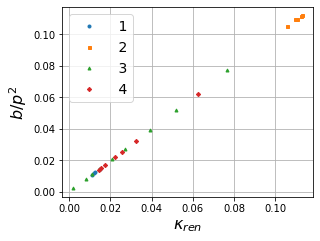

'saved to kappa_ren_fig49a_dataset='

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,3.5))
sl = np.s_[:]

for i, current_set in enumerate([set_eps, set_eps_dissip, set_D0, set_kappa]) : 
    #ax.errorbar(current_set['x'],current_set['y'], yerr=current_set['yerr'], label='%2.0f' % (i+1), marker=markers[i], ls='', ms=3, \
    #            elinewidth=1.5, capsize=3.0, color=colors[i])
    ax.plot(current_set['x'],current_set['y'], label='%2.0f' % (i+1), marker=markers[i], ls='', ms=3, color=colors[i])
ax.set(xlabel=r'$\kappa_{ren}$', ylabel=r'$b/p^2$', xscale='linear', yscale='linear'); ax.grid()
#ax.plot(np.concatenate((set_D0['x'],set_eps_dissip['x'])),np.concatenate((set_D0['x'],set_eps_dissip['x'])),'k:', color='silver')
ax.legend()
# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/kappa_ren.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()
get_plot_data_blocks(ax,'kappa_ren_fig49a_dataset=')

In [13]:
gnuplot2 = cm.get_cmap('plasma', 256)
#gnuplot2 = cm.get_cmap('gray', 256)
newcolors_large = gnuplot2(np.linspace(0, 1, 256))[1:]

In [14]:
newcolors = np.take(newcolors_large, [10, 80, 140, 200], axis=0)

In [15]:
newcolors

array([[0.156421, 0.020651, 0.574065, 1.      ],
       [0.589719, 0.072878, 0.630408, 1.      ],
       [0.843484, 0.338062, 0.424013, 1.      ],
       [0.985301, 0.63533 , 0.221265, 1.      ]])

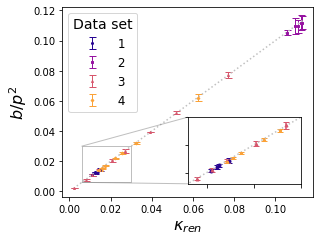

In [18]:
fig, ax = plt.subplots(figsize=[4.5, 3.5])

for i, current_set in enumerate([set_eps, set_eps_dissip, set_D0, set_kappa]) : 
    ax.errorbar(current_set['x'],current_set['y'], yerr=(2.0*np.array(current_set['yerr'])), ls='', ms=2, elinewidth=1.0, capsize=3.5, color=newcolors[i], label='%2.0f' % (i+1), marker=markers[i])
ax.plot(np.concatenate((set_D0['x'],set_eps_dissip['x'])),np.concatenate((set_D0['x'],set_eps_dissip['x'])),':', color='silver')
ax.set(xlabel=r'$\kappa_{ren}$', ylabel=r'$b/p^2$', xscale='linear', yscale='linear'); ax.grid(False)
lgd = ax.legend(fontsize=12, title='Data set')

#inset axes....
axins = ax.inset_axes([0.5, 0.07, 0.45, 0.35])
for i, current_set in enumerate([set_eps, set_eps_dissip, set_D0, set_kappa]) : 
    axins.errorbar(current_set['x'],current_set['y'], yerr=(2.0*np.array(current_set['yerr'])), ls='', ms=3, elinewidth=1.5, capsize=3.0, color=newcolors[i])
axins.plot(set_D0['x'],set_D0['x'],':', color='silver')
# sub region of the original image
x1, x2, y1, y2 = 0.006, 0.03, 0.006, 0.03
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/kappa_ren.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()

plt.show()

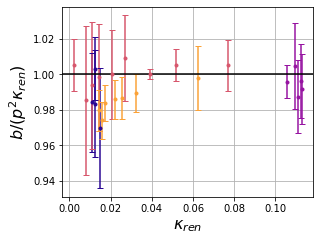

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,3.5))
sl = np.s_[:]

for i, current_set in enumerate([set_eps,set_eps_dissip,  set_D0, set_kappa]) : 
    ax.errorbar(current_set['x'],np.array(current_set['y'])/np.array(current_set['x']), yerr=np.array(current_set['yerr'])/np.array(current_set['x']), ls='', marker='o', ms=3, elinewidth=1.5, capsize=3.0, color=newcolors[i])
ax.axhline(1)
ax.set(xlabel=r'$\kappa_{ren}$', ylabel=r'$b/(p^2 \kappa_{ren})$', xscale='linear', yscale='linear'); ax.grid()
#ax.plot(set_D0['x'],set_D0['x'],'k:', color='silver')

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/kappa_ren_relative.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()

In [18]:
np.array(current_set['y'])/np.array(current_set['x'])

array([0.99789819, 0.98968713, 0.98659357, 0.98583177, 0.98395999,
       0.97413312, 0.97968371])

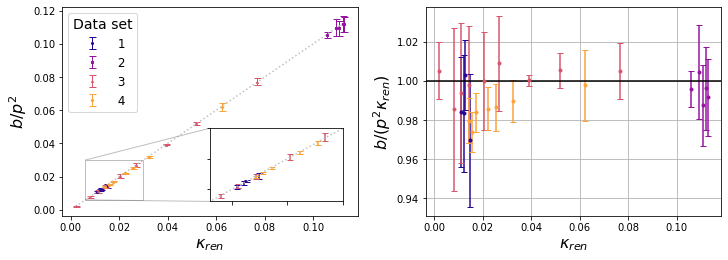

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10,3.5))

for i, current_set in enumerate([set_eps, set_eps_dissip, set_D0, set_kappa]) : 
    ax[0].errorbar(current_set['x'],current_set['y'], yerr=(2.0*np.array(current_set['yerr'])), ls='', ms=2, elinewidth=1.0, capsize=3.5, color=newcolors[i], label='%2.0f' % (i+1), marker=markers[i])
ax[0].plot(np.concatenate((set_D0['x'],set_eps_dissip['x'])),np.concatenate((set_D0['x'],set_eps_dissip['x'])),'k:', color='silver')
ax[0].set(xlabel=r'$\kappa_{ren}$', ylabel=r'$b/p^2$', xscale='linear', yscale='linear'); ax[0].grid(False)
lgd = ax[0].legend(fontsize=12, title='Data set')

#inset axes....
axins = ax[0].inset_axes([0.5, 0.07, 0.45, 0.35])
for i, current_set in enumerate([set_eps, set_eps_dissip, set_D0, set_kappa]) : 
    axins.errorbar(current_set['x'],current_set['y'], yerr=(2.0*np.array(current_set['yerr'])), ls='', ms=3, elinewidth=1.5, capsize=3.0, color=newcolors[i])
axins.plot(set_D0['x'],set_D0['x'],'k:', color='silver')
# sub region of the original image
x1, x2, y1, y2 = 0.006, 0.03, 0.006, 0.03
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax[0].indicate_inset_zoom(axins)

sl = np.s_[:]

for i, current_set in enumerate([set_eps,set_eps_dissip,  set_D0, set_kappa]) : 
    ax[1].errorbar(current_set['x'],np.array(current_set['y'])/np.array(current_set['x']), yerr=np.array(current_set['yerr'])/np.array(current_set['x']), ls='', marker='o', ms=3, elinewidth=1.5, capsize=3.0, color=newcolors[i])
ax[1].axhline(1)
ax[1].set(xlabel=r'$\kappa_{ren}$', ylabel=r'$b/(p^2 \kappa_{ren})$', xscale='linear', yscale='linear'); ax[1].grid()

#pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/fig7.pdf')
#pp.savefig(bbox_inches='tight')
#pp.close()

plt.show()